## **Stationarity in Stochastic Processes**

A stochastic process is said to be **stationary** if its statistical properties, such as mean, variance, and autocorrelation, do not change over time. Mathematically, a strict-sense stationary (SSS) process $ \{X_t\} $ satisfies the following conditions for all time instants $ t_1, t_2, \ldots, t_n $ and for all $ n $ and for all time lags $ \tau $:

1. **Constant Mean**: 
   The mean of the process does not depend on time $ t $.
   $$ E[X_t] = \mu $$
   where $ \mu $ is a constant.

2. **Constant Variance**: 
   The variance of the process is constant and does not depend on time $ t $.
   $$ \text{Var}[X_t] = \sigma^2 $$
   where $ \sigma^2 $ is a constant.

3. **Constant Autocovariance**: 
   The covariance between the two time points depends only on the distance or lag between the two time points, and not on the actual time points themselves.
   $$ \text{Cov}[X_t, X_{t+\tau}] = \text{Cov}[X_{t+h}, X_{t+h+\tau}] $$
   for all $ t, h, \tau $.


### **``Example of Stationarity``: White Noise**
**White Noise** is a sequence of random variables that are each zero-mean and have constant variance, with no serial correlation.

A Stationary Stochastic Process possesses:

- **Constant Mean:** The average value remains the same over time.
- **Constant Variance:** The variability is consistent over time.
- **Time-Invariant Autocorrelation:** The correlation between variables of different time intervals depends only on the interval length, not on the starting time.

White noise exemplifies a stationary stochastic process by adhering to these three conditions, ensuring its statistical properties (mean, variance, and autocorrelation) are stable and time-independent. This makes white noise a fundamental model in various scientific and engineering fields.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning


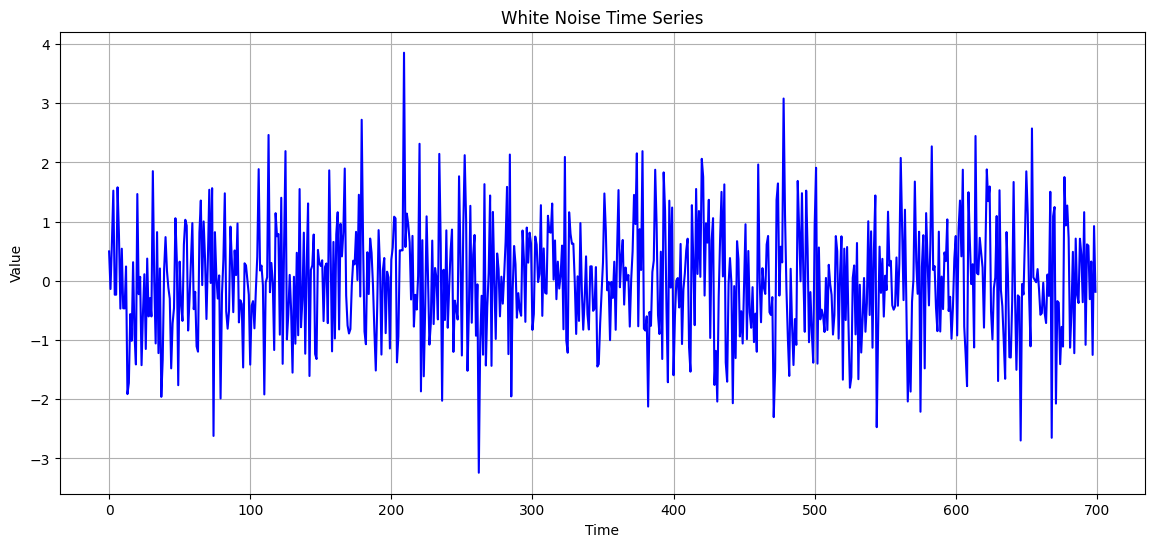

In [18]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate white noise
white_noise = np.random.normal(loc=0, scale=1, size=700)  # loc is mean, scale is standard deviation

# Visualize the white noise series
plt.figure(figsize=(14, 6))
plt.plot(white_noise, color='blue')
plt.title('White Noise Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


###  **``Example of Non-Stationarity``: Random Walk**

A **random walk** is a time series model where each current term is equal to the previous term plus a random error.

#### **Mathematical Definition of Random Walk**

A random walk can be mathematically defined as follows:
$$ X_t = X_{t-1} + \epsilon_t $$
where:
- $ X_t $ is the value of the series at time $ t $,
- $ \epsilon_t $ is a white noise error term at time $ t $.

#### **Characteristics of Random Walk (Non-Stationarity)**

- **1. Mean is Dependent on Time**
The mean of a random walk will depend on time because each value is a sum of all previous error terms, which are random.

- **2. Variance Increases with Time**
The variance of a random walk increases over time, as each term adds additional variability to the process.

- **3. Autocovariance Depends on Time**
The covariance between values at different time points depends on the time indices, violating the condition of time-invariant covariance.


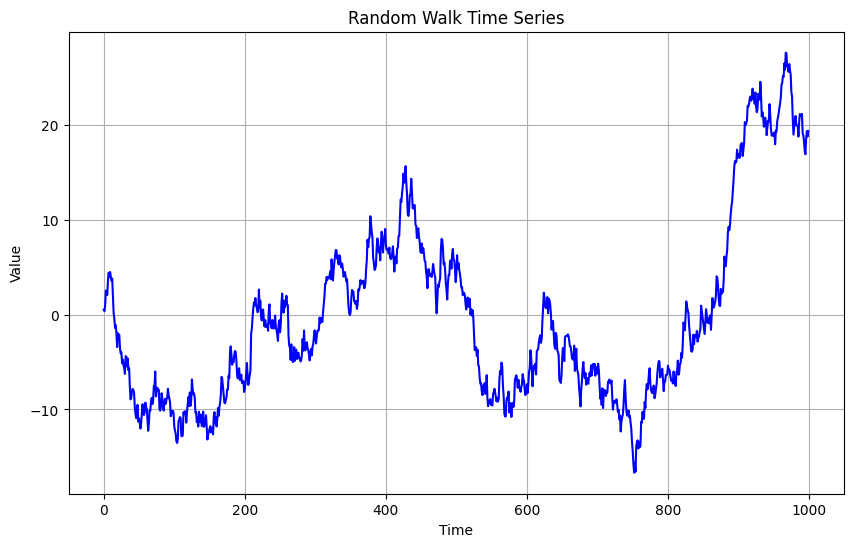

In [19]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate a white noise series
epsilon = np.random.normal(loc=0, scale=1, size=1000)

# Generate a random walk series
Random_Walk = np.cumsum(epsilon)

# Visualize the random walk series
plt.figure(figsize=(10, 6))
plt.plot(Random_Walk, color='blue')
plt.title('Random Walk Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


#### **Augmented Dickey-Fuller (ADF) Test**

The ADF test is utilized to ascertain whether a given time series is stationary, specifically focusing on identifying the presence of a unit root. The unit root test explores the hypothesis:

- $ H_0: \phi = 1 $
- $ H_1: \phi < 1 $

Here, $\phi$ is the coefficient of the first lag in an autoregressive model of order one. If $H_0$ is not rejected, it indicates that the series possesses a unit root and is non-stationary. The ADF test enhances the Dickey-Fuller test by accommodating higher-order autoregressive processes by including lagged differences of the series.

#### **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**

Contrary to the ADF test, the KPSS test null hypothesis assumes that the data is stationary around a deterministic trend. The hypotheses are formulated as:

- $ H_0: \text{The process is trend-stationary} $
- $ H_1: \text{The process has a unit root (non-stationary)} $

The KPSS test scrutinizes the residuals from the trend stationary regression model, ensuring the variances of the residuals are consistent over time. A low p-value indicates a rejection of the null hypothesis, suggesting the series is non-stationary.

### **Note**

- **ADF Test**: Primarily used to identify the existence of unit roots and hence, to infer the non-stationarity of the time series.
- **KPSS Test**: Often used to affirm the findings from the ADF test, providing a comprehensive view by also checking for stationarity around a trend.
  
In practice, employing both tests provides a robust mechanism to confirm the stationarity or non-stationarity of a time series, ensuring the reliability of subsequent analyses like forecasting.


In [34]:
# Function to perform ADF and KPSS tests
def ADF_check_stationarity(time_series):
    # ADF Test
    adf_result = adfuller(time_series)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:', adf_result[4])
    
    if adf_result[1] <= 0.05:
        print('ADF test: The time series is stationary')
    else:
        print('ADF test: The time series is non-stationary')

def KPSS_check_stationarity(time_series):
    # KPSS Test

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", InterpolationWarning)
        kpss_result = kpss(time_series, regression='c')


    print(f'\nKPSS Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    print('Critical Values:', kpss_result[3])
    
    if kpss_result[1] > 0.05:
        print('KPSS test: The time series is stationary')
    else:
        print('KPSS test: The time series is non-stationary')
    

In [42]:
# Check stationarity for white noise
ADF_check_stationarity(white_noise)
KPSS_check_stationarity(white_noise)

ADF Statistic: -14.395411925442643
p-value: 8.684251659589543e-27
Critical Values: {'1%': -3.4397804336105198, '5%': -2.865701589065464, '10%': -2.5689861435625576}
ADF test: The time series is stationary

KPSS Statistic: 0.08356296659891566
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS test: The time series is stationary


In [45]:
# Check stationarity for Random Walk 
ADF_check_stationarity(Random_Walk)
KPSS_check_stationarity(Random_Walk)

ADF Statistic: -0.9659524876918764
p-value: 0.7654789696692577
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
ADF test: The time series is non-stationary

KPSS Statistic: 1.1184578212033518
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS test: The time series is non-stationary


In the realm of finance, stock prices typically exhibit **non-stationary** behavior, influenced by various economic factors, and thus, their statistical properties like mean and variance evolve over time. Conversely, **daily returns**, representing day-to-day percentage changes in stock prices, are often treated as **stationary** in the short term, maintaining consistent statistical properties. 

In [70]:
import yfinance as yf

data = yf.download("MSFT", start="2004-10-10", end="2022-10-10")
Close = data['Adj Close'].pct_change()
Tmp = data.index
daily_return = Close[1:].values
Stock_price = data['Adj Close'].values

[*********************100%%**********************]  1 of 1 completed


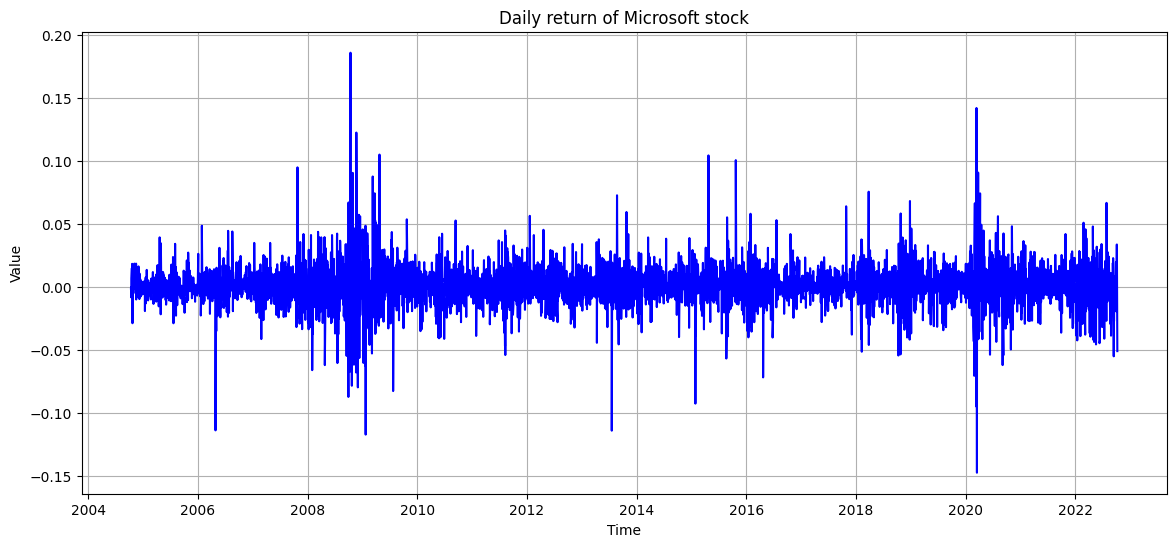

In [71]:
plt.figure(figsize=(14, 6))
plt.plot(Tmp[1:], daily_return, color='blue')
plt.title('Daily return of Microsoft stock')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [68]:
# Check stationarity for Microsoft stock price
ADF_check_stationarity(daily_return)
KPSS_check_stationarity(daily_return)

ADF Statistic: -16.37237324848324
p-value: 2.802233507681001e-29
Critical Values: {'1%': -3.4318001383429073, '5%': -2.862180789085396, '10%': -2.5671110954259877}
ADF test: The time series is stationary

KPSS Statistic: 0.3354930775527459
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS test: The time series is stationary


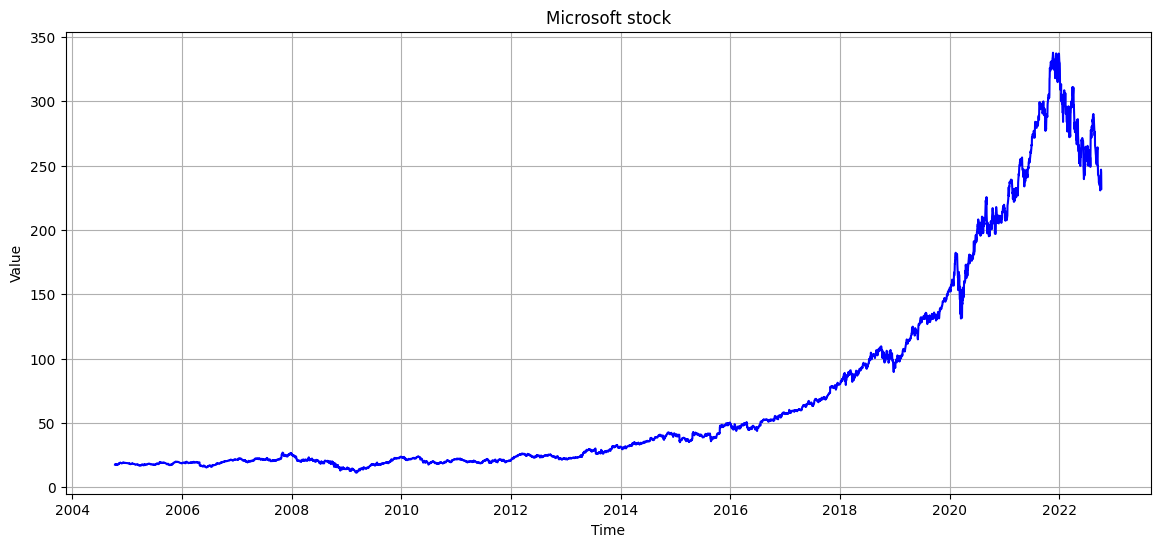

In [72]:
plt.figure(figsize=(14, 6))
plt.plot(Tmp, Stock_price, color='blue')
plt.title('Microsoft stock')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [73]:
# Check stationarity for Microsoft stock price
ADF_check_stationarity(Stock_price)
KPSS_check_stationarity(Stock_price)

ADF Statistic: 1.1469501207063468
p-value: 0.9955980599039266
Critical Values: {'1%': -3.431804654470196, '5%': -2.862182784189927, '10%': -2.5671121575144014}
ADF test: The time series is non-stationary

KPSS Statistic: 7.40007310651578
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS test: The time series is non-stationary
